### IMPORT REQUIRED LIBRARIES

In [87]:
%matplotlib inline
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### READ DATASET

In [2]:
df = pd.read_csv('Video_games_esrb_rating.csv')
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [4]:
df.shape

(1895, 34)

#### DO SOME ANALISYS ON THE DATA

In [65]:
df.count()

title                       1895
console                     1895
alcohol_reference           1895
animated_blood              1895
blood                       1895
blood_and_gore              1895
cartoon_violence            1895
crude_humor                 1895
drug_reference              1895
fantasy_violence            1895
intense_violence            1895
language                    1895
lyrics                      1895
mature_humor                1895
mild_blood                  1895
mild_cartoon_violence       1895
mild_fantasy_violence       1895
mild_language               1895
mild_lyrics                 1895
mild_suggestive_themes      1895
mild_violence               1895
no_descriptors              1895
nudity                      1895
partial_nudity              1895
sexual_content              1895
sexual_themes               1895
simulated_gambling          1895
strong_janguage             1895
strong_sexual_content       1895
suggestive_themes           1895
use_of_alc

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

In [77]:
pd.unique(df['esrb_rating'])

array(['E', 'ET', 'M', 'T'], dtype=object)

#### SUMMARIZE DATA TO PLOT GAMES COUNT BY RATING

In [78]:
summ_data = df.groupby('esrb_rating').agg({'title':'count'})
summ_data.head(10)

,title
esrb_rating,
E,416
ET,403
M,387
T,689


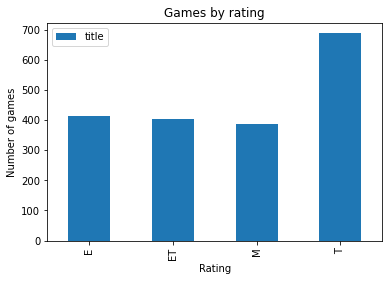

In [82]:
summ_data.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Number of games')
plt.title('Games by rating')
plt.show()

### SPLIT DATA INTO FEATURES AND LABELS

We eliminate first column too since we don´t need the games names

In [15]:
X = df[df.columns[1:-1]]
X.shape

(1895, 32)

In [16]:
y = df[df.columns[-1]]
y.shape

(1895,)

### SPLIT DATA INTO TRAIN AND TEST SETS

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=10)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1326, 32)
(569, 32)
(1326,)
(569,)


#### WE CAN ALSO USE THE TEST DATA SET PROVIDED

In [136]:
test_df = pd.read_csv('test_esrb.csv')
test_df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
1,Surf World Series,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2,The Metronomicon: Slay the Dance Floor,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T
3,Windjammers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
4,Rock of Ages 2: Bigger and Boulder,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,ET


In [137]:
X_test_df = test_df[test_df.columns[1:-1]]
X_test_df.head()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [138]:
y_test_df = test_df[test_df.columns[-1]]
y_test_df.head()

0     T
1     E
2     T
3     E
4    ET
Name: esrb_rating, dtype: object

In [140]:
print(X_test_df.shape)
print(y_test_df.shape)

(500, 32)
(500,)


### CREATE OUR MODEL

In [152]:
rfc = RandomForestClassifier(n_estimators=30,random_state=10, verbose=5, n_jobs=-1)

### TRAIN THE MODEL

In [153]:
rfc = rfc.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 30building tree 2 of 30building tree 3 of 30

building tree 4 of 30

building tree 5 of 30building tree 6 of 30building tree 7 of 30building tree 8 of 30



building tree 9 of 30building tree 10 of 30building tree 11 of 30


building tree 12 of 30
building tree 13 of 30building tree 14 of 30

building tree 15 of 30
building tree 16 of 30
building tree 17 of 30
building tree 18 of 30
building tree 19 of 30building tree 20 of 30

building tree 21 of 30
building tree 22 of 30
building tree 23 of 30building tree 24 of 30

building tree 25 of 30building tree 26 of 30

building tree 27 of 30building tree 28 of 30

building tree 29 of 30building tree 30 of 30



[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished


### CHECK MODEL´S ACCURACY

In [154]:
y_pred_test = rfc.predict(X_test_df)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  22 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished


In [155]:
accuracy = accuracy_score(y_test_df,y_pred_test)
accuracy

0.844

#### CONFUSION MATRIX

In [156]:
confusion_matrix(y_test_df, y_pred_test)

array([[ 96,   3,   0,   1],
       [  5, 106,   0,  15],
       [  0,   0,  60,  30],
       [  2,  15,   7, 160]], dtype=int64)

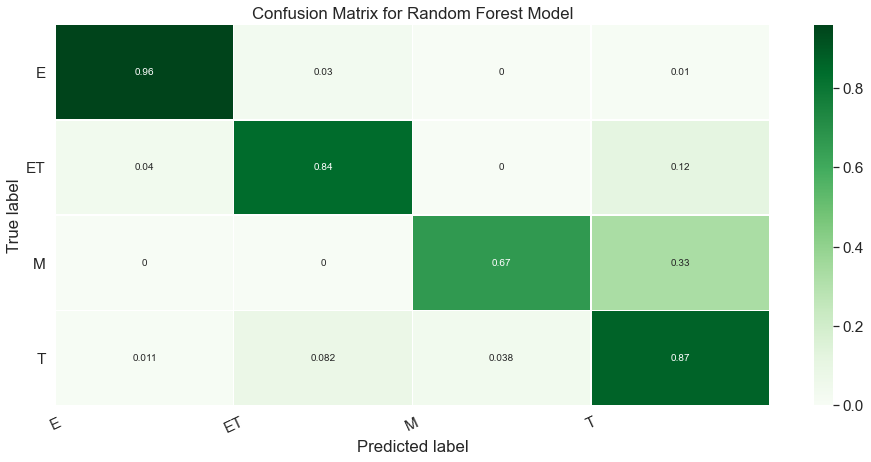

In [157]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_df, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['E', 'ET', 'M', 
               'T']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

Text(152.5, 0.5, 'Predicted labels')

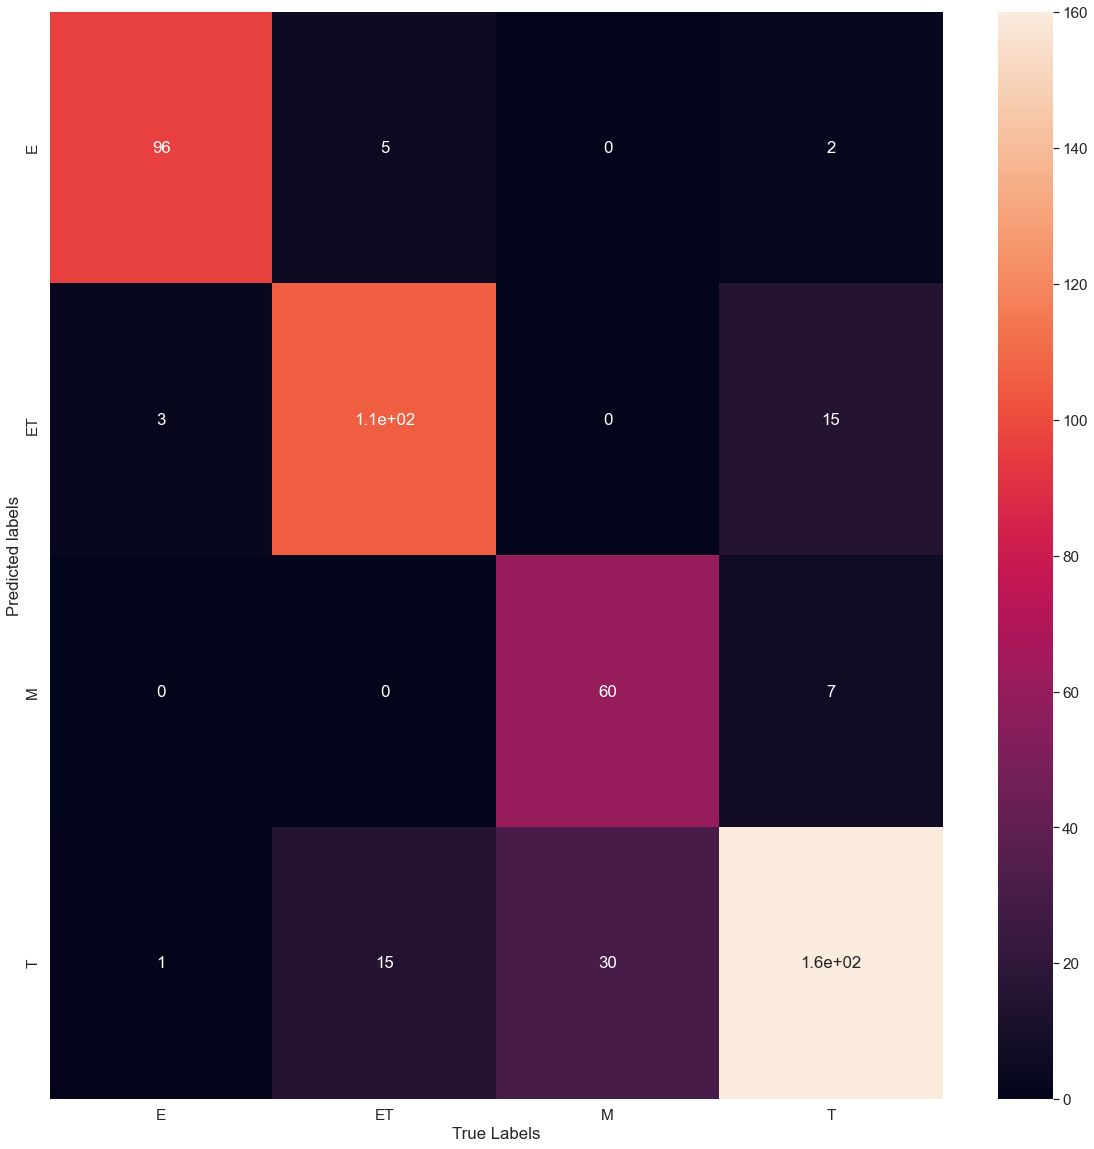

In [158]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,20))
mat = confusion_matrix(y_test_df, y_pred_test)
sns.heatmap(mat.T,annot = True, xticklabels=pd.unique(df['esrb_rating']), yticklabels=pd.unique(df['esrb_rating']))
plt.xlabel('True Labels')
plt.ylabel('Predicted labels')

### MAKE SOME PREDICTIONS

#### READ DATA TO BE PREDICTED

In [161]:
for_pred_data = pd.read_csv('Video_games_rating_my_games.csv')
for_pred_data.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
0,Mygame1,0,1,0,1,1,0,0,1,0,...,0,1,1,1,0,1,1,1,1,1
1,Mygame2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mygame3,2,1,1,0,0,1,0,0,1,...,0,0,1,1,1,0,0,0,0,1


In [163]:
games_list = for_pred_data[for_pred_data.columns[0]]
games_list

0    Mygame1
1    Mygame2
2    Mygame3
Name: title, dtype: object

#### REMOVE FIRST COLUMN

In [164]:
for_pred_data.drop(['title'], axis=1, inplace=True)
for_pred_data.head()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
0,0,1,0,1,1,0,0,1,0,1,...,0,1,1,1,0,1,1,1,1,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,0,0,1,0,0,1,1,...,0,0,1,1,1,0,0,0,0,1


#### GET PREDICTIONS

In [171]:
for index, row in for_pred_data.iterrows():
    #print(for_pred_data.iloc[index].tolist())
    #print(np.array(for_pred_data.iloc[index].tolist()).reshape(1,32))
    print('Game: '+ games_list[index] + '. Rating: ' + rfc.predict(np.array(for_pred_data.iloc[index].tolist()).reshape(1,32)))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  22 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s


['Game: Mygame1. Rating: M']
['Game: Mygame2. Rating: T']
['Game: Mygame3. Rating: M']


[Parallel(n_jobs=8)]: Done  22 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  22 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished


##  Final Project - Application of Random Forest

* This data contains the name for 1895 games with 34 of ESRB rating content with the name and console as features for each game.

* A single data point is represented as a binary value 0-1 for Console and a binary vector for the features of ESRB content.

* RP, EC, A, rating is not provided in the current version of the data, it might be included in the next updates.

## Data Acquisition
The data was taken from kaggle: [https://www.kaggle.com/imohtn/video-games-rating-by-esrb]

In [168]:
# import libraries for the project
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_score, recall_score, auc, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import label_binarize
RSEED=50

In [169]:
# load dataset
df = pd.read_csv('/Users/jjimenez/Documents/Estudio/College/George Brown/Semester I/Math Concepts for ML/GBC-MCfML/final_project/data/Video_games_esrb_rating.csv')
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

## Descriptive analysis 

In [171]:
# Selecting numeric columns
df_number = df.select_dtypes('number')
# Transform to categorical type
df_category = df_number.astype('category')
result = df_category.describe().transpose()
freq_1 = pd.Series(result['count'] - result['freq'], name="freq_1").transpose()
result['freq_1'] = freq_1
result.columns=['count','unique','top','freq_0','freq_1'] 
result

,count,unique,top,freq_0,freq_1
console,1895,2,0,994,901
alcohol_reference,1895,2,0,1800,95
animated_blood,1895,2,0,1876,19
blood,1895,2,0,1463,432
blood_and_gore,1895,2,0,1656,239
cartoon_violence,1895,2,0,1858,37
crude_humor,1895,2,0,1792,103
drug_reference,1895,2,0,1829,66
fantasy_violence,1895,2,0,1477,418
intense_violence,1895,2,0,1671,224


In [172]:
# Each column explained by the target
features_dict = {}
for col in df_number:
    features_df = df.groupby('esrb_rating', as_index=False).agg({f'{col}': 'mean'})
    features_df[f'{col}'] = features_df[f'{col}'] * 100
    features_dict[f'{col}'] = features_df

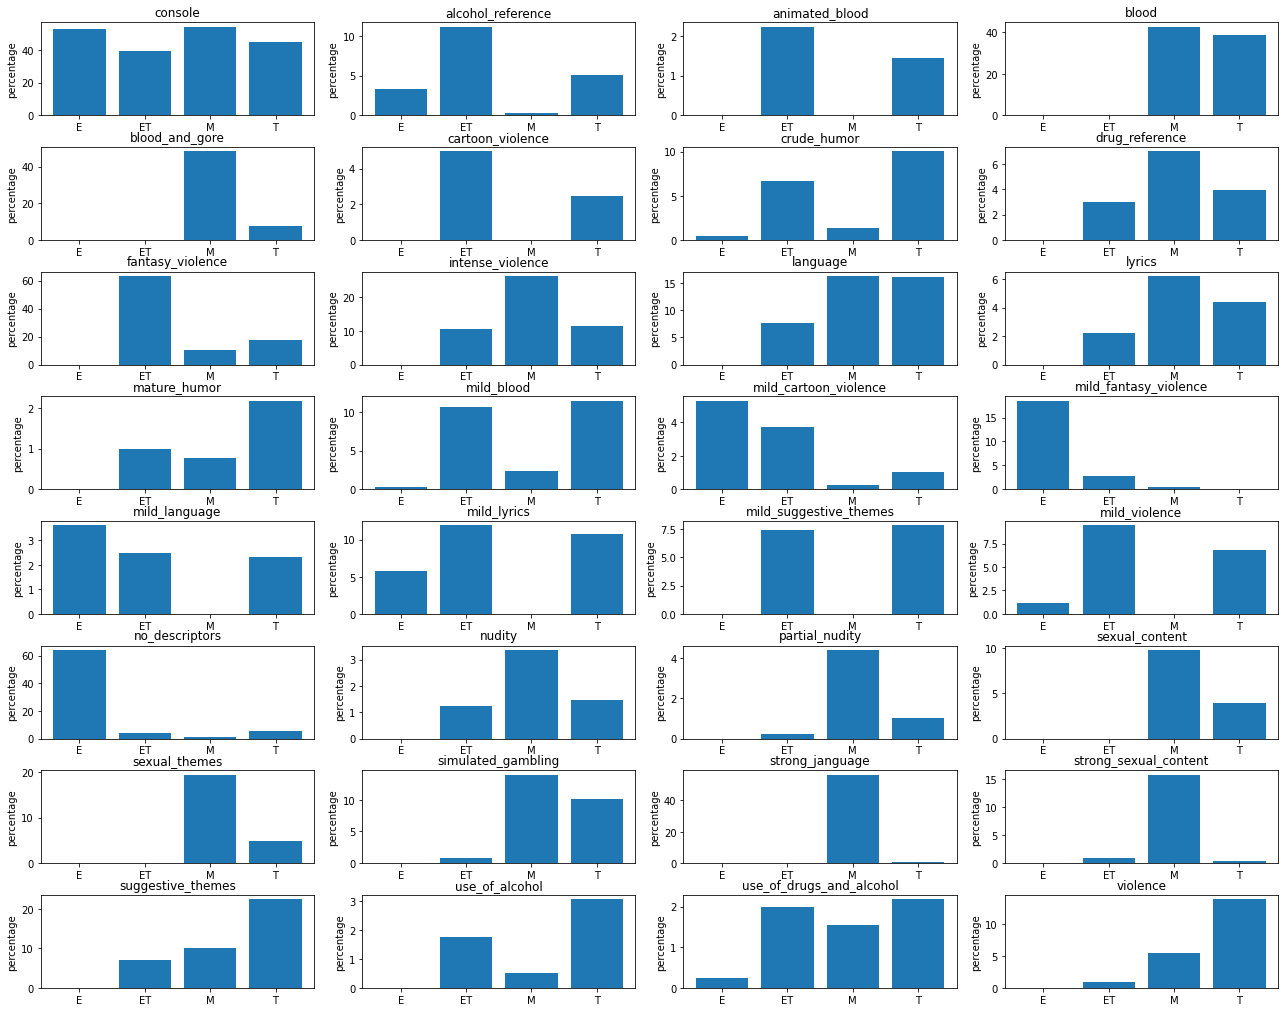

In [173]:
dict_key = list(features_dict.keys())
fig, axs = plt.subplots(8, 4, figsize=(18,14))
fig.tight_layout()

for i, axis in enumerate(axs.reshape(32)):
    data = features_dict[dict_key[i]]
    axis.bar(x=data['esrb_rating'], height=data[f'{dict_key[i]}'])
    axis.title.set_text(dict_key[i])
    axis.set_ylabel('percentage')
    
plt.xlabel = 'Ratings'

## Target exploration

(array([416.,   0.,   0., 403.,   0.,   0., 387.,   0.,   0., 689.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

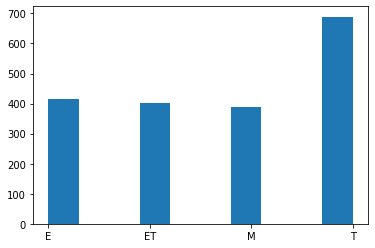

In [174]:
plt.hist(df['esrb_rating'])
# E: Everyone
# ET: Everyone +10years
# M: Mature
# T: Teen

In [175]:
# Count of target variable, categories with similar distribution
df['esrb_rating'].value_counts()

T     689
E     416
ET    403
M     387
Name: esrb_rating, dtype: int64

In [176]:
# Drop the id from dataset
df = df.drop(columns='title')

## Split Data into Training and Testing Set

In [177]:
# Partition of train
X_train = df_number
y_train = df['esrb_rating']

test = pd.read_csv('/Users/jjimenez/Documents/Estudio/College/George Brown/Semester I/Math Concepts for ML/GBC-MCfML/final_project/data/test_esrb.csv')
# Partition of test
y_test = test.iloc[:, -1]
X_test = test.iloc[:, 1:-1]

print(df.shape)
print(test.shape)

(1895, 33)
(500, 34)


In [178]:
# Create the model object
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

In [179]:
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=50,
                       verbose=1)

In [180]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 527
Average maximum depth 27


In [181]:
train_rf_predictions = model.predict(X_train)
train_rf_probs = model.predict_proba(X_train)[:, 1]

rf_predictions = model.predict(X_test)
rf_probs = model.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [182]:
train_rf_probs

array([0.        , 0.94133333, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [199]:
y_test.unique()

array(['T', 'E', 'ET', 'M'], dtype=object)

In [200]:
y = label_binarize(y_test, classes=['T', 'E', 'ET', 'M'])
n_classes = 4

In [206]:
print(y.shape)
y

(500, 4)


array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

In [192]:
# classifier
clf = OneVsRestClassifier(model)
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s

In [207]:
print(y_score.shape)
y_score

(500, 4)


array([[0.        , 0.00274599, 0.07382815, 0.92342586],
       [1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.18759573, 0.65079829, 0.16160597],
       ...,
       [0.        , 0.00934579, 0.91588785, 0.07476636],
       [0.        , 0.90619149, 0.        , 0.09380851],
       [0.        , 0.        , 0.00846813, 0.99153187]])

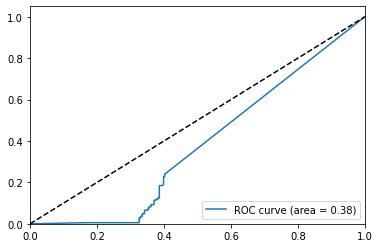

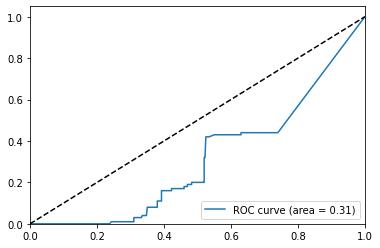

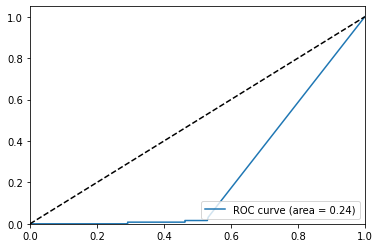

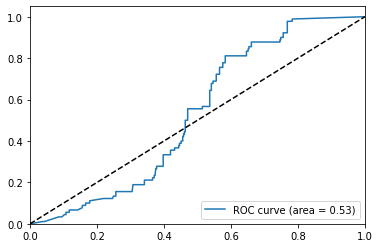

In [203]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    #plt.xlabel('False Positive Rate')
    #plt.ylabel('True Positive Rate')
    #plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [208]:
cm = confusion_matrix(y_test, rf_predictions)
accuracy = accuracy_score(y_test, rf_predictions)
precision = precision_score(y_test, rf_predictions, average="weighted")

accuracy, precision

(0.842, 0.8496016944604329)

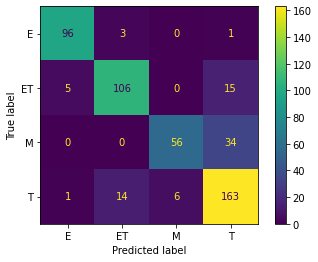

In [210]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

<h3>Import Dataset</h3>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv("data/Video_games_esrb_rating.csv")
df_test = pd.read_csv("data/test_esrb.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     500 non-null    object
 1   console                   500 non-null    int64 
 2   alcohol_reference         500 non-null    int64 
 3   animated_blood            500 non-null    int64 
 4   blood                     500 non-null    int64 
 5   blood_and_gore            500 non-null    int64 
 6   cartoon_violence          500 non-null    int64 
 7   crude_humor               500 non-null    int64 
 8   drug_reference            500 non-null    int64 
 9   fantasy_violence          500 non-null    int64 
 10  intense_violence          500 non-null    int64 
 11  language                  500 non-null    int64 
 12  lyrics                    500 non-null    int64 
 13  mature_humor              500 non-null    int64 
 14  mild_blood                

In [5]:
df_train.head(10)

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T
5,Monster Energy Supercross - The Official Video...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
6,Monochrome Order,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
7,Blightbound,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,T
8,Maquette,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
9,FATAL FURY™ BATTLE ARCHIVES VOL.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,T


<h3>Preprocssing</h3>

In [6]:
X_train = df_train.iloc[:, 1:-1]
X_train.shape

(1895, 32)

In [7]:
y_train = df_train.iloc[:, -1]
y_train.shape

(1895,)

In [8]:
X_test = df_test.iloc[:, 1:-1]
X_test.shape

(500, 32)

In [9]:
y_test = df_test.iloc[:, -1]
y_test

0       T
1       E
2       T
3       E
4      ET
       ..
495     M
496     M
497     M
498     T
499     T
Name: esrb_rating, Length: 500, dtype: object

In [10]:
labels = y_train.unique()
labels

array(['E', 'ET', 'M', 'T'], dtype=object)

<h3>Model Building</h3>

In [11]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [12]:
y_predict = rfc.predict(X_test)
#y_predict = label_encoder.inverse_transform(y_predict)
y_predict

array(['T', 'E', 'M', 'E', 'ET', 'M', 'M', 'ET', 'E', 'T', 'T', 'T', 'ET',
       'ET', 'T', 'M', 'M', 'T', 'E', 'ET', 'T', 'ET', 'ET', 'T', 'ET',
       'ET', 'ET', 'T', 'M', 'T', 'T', 'ET', 'ET', 'T', 'T', 'T', 'M',
       'ET', 'E', 'T', 'T', 'T', 'ET', 'M', 'E', 'E', 'T', 'ET', 'ET',
       'ET', 'T', 'T', 'M', 'ET', 'T', 'ET', 'ET', 'T', 'T', 'T', 'E',
       'T', 'ET', 'E', 'M', 'ET', 'T', 'E', 'E', 'E', 'E', 'ET', 'T',
       'ET', 'T', 'ET', 'T', 'M', 'E', 'E', 'T', 'T', 'T', 'ET', 'E', 'T',
       'T', 'T', 'ET', 'ET', 'E', 'ET', 'T', 'T', 'T', 'E', 'ET', 'ET',
       'ET', 'T', 'E', 'E', 'T', 'T', 'T', 'E', 'M', 'T', 'T', 'T', 'T',
       'ET', 'ET', 'T', 'E', 'T', 'T', 'ET', 'T', 'E', 'T', 'T', 'ET',
       'E', 'T', 'T', 'E', 'ET', 'ET', 'T', 'ET', 'T', 'M', 'ET', 'E',
       'T', 'ET', 'T', 'ET', 'ET', 'E', 'T', 'T', 'T', 'M', 'T', 'M', 'T',
       'ET', 'ET', 'ET', 'E', 'ET', 'T', 'E', 'E', 'E', 'M', 'T', 'T',
       'ET', 'ET', 'ET', 'E', 'M', 'ET', 'M', 'E', 'ET', 'T', 

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

cm = confusion_matrix(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict, average="weighted")

accuracy, precision

(0.842, 0.8485647843601896)

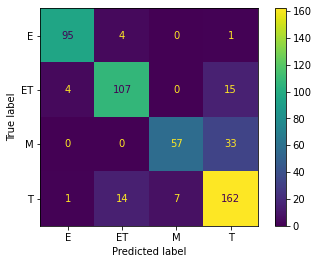

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

<h3>Compare Different Number of Estimators</h3>

In [15]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
%matplotlib inline

def TestRandForest(X_train, y_train, X_test, y_test, n_est=100, verbose=3):
    #verbose flags: 1<<0 print accuracy and precision, 1<<1 plot confusion matrix 
    rfc = RandomForestClassifier(n_estimators=n_est, n_jobs=-1)
    rfc.fit(X_train, y_train)
    y_predict = rfc.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    accuracy = accuracy_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict, average="weighted")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_train.unique())
    if verbose & (1 << 0) > 0:
        print(f'n_estimators = {n_est} Accuracy : {accuracy:.4f}   Precision(weighted) : {precision:.4f}')
    if verbose & (1 << 1) > 0:
        disp.plot()
        plt.title("Randon Forest Classifier (n_estimators=" + str(n_est) +")")
        plt.show()
    return disp, accuracy, precision

n_estimators = 1 Accuracy : 0.7920   Precision(weighted) : 0.7927


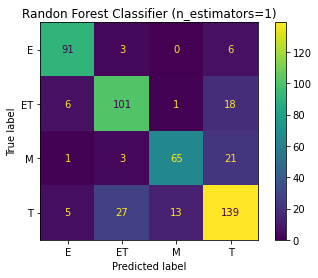

n_estimators = 10 Accuracy : 0.8460   Precision(weighted) : 0.8510


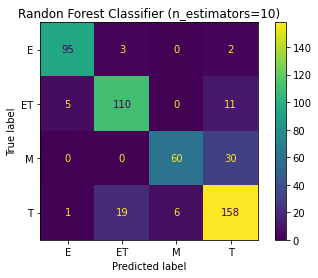

n_estimators = 50 Accuracy : 0.8460   Precision(weighted) : 0.8512


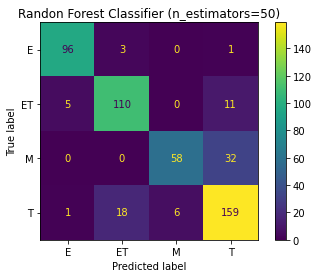

n_estimators = 100 Accuracy : 0.8440   Precision(weighted) : 0.8501


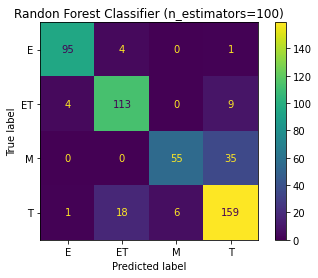

n_estimators = 500 Accuracy : 0.8440   Precision(weighted) : 0.8507


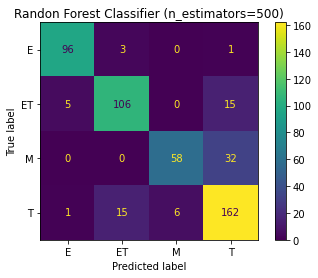

In [16]:
for n in [1, 10, 50, 100, 500]:
    disp, accuracy, precision = TestRandForest(X_train, y_train, X_test, y_test, n_est=n, verbose=3)

<h3>PCA</h3>

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [18]:
X_train_pca = pca.fit_transform(X_train)
X_train_pca.shape

(1895, 2)

In [19]:
X_test_pca = pca.fit_transform(X_test)
X_test_pca.shape

(500, 2)

n_estimators = 50 Accuracy : 0.4700   Precision(weighted) : 0.4219


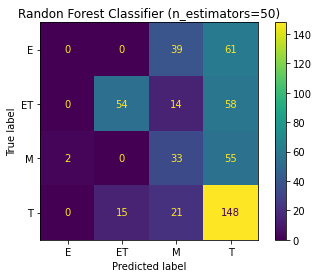

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1dabaf73070>,
 0.47,
 0.4218742671387938)

In [20]:
TestRandForest(X_train_pca, y_train, X_test_pca, y_test, 50)

<h3>Compare Different Number of PCA Components</h3>

In [21]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

def ApplyPCA(X_train, X_test, n_compo=2):
    pca = PCA(n_components=n_compo)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.fit_transform(X_test)
    return X_train_pca, X_test_pca

In [22]:
results = pd.DataFrame(index=range(2, 33), columns=["accuracy", "precision"], dtype=float)
results = results.fillna(0)
results.shape

(31, 2)

In [23]:
for n in range(2, 33):
    X_train_pca, X_test_pca = ApplyPCA(X_train, X_test, n_compo=n)
    disp, accuracy, precision = TestRandForest(X_train_pca, y_train, X_test_pca, y_test, n_est=50, verbose=0)
    results.iloc[n - 2, 0] = accuracy
    results.iloc[n - 2, 1] = precision

In [24]:
results

,accuracy,precision
2,0.446,0.403159
3,0.424,0.379058
4,0.470,0.505288
5,0.422,0.414613
6,0.504,0.545170
7,0.398,0.445816
8,0.418,0.391856
9,0.424,0.389744
10,0.368,0.377419
11,0.404,0.380644


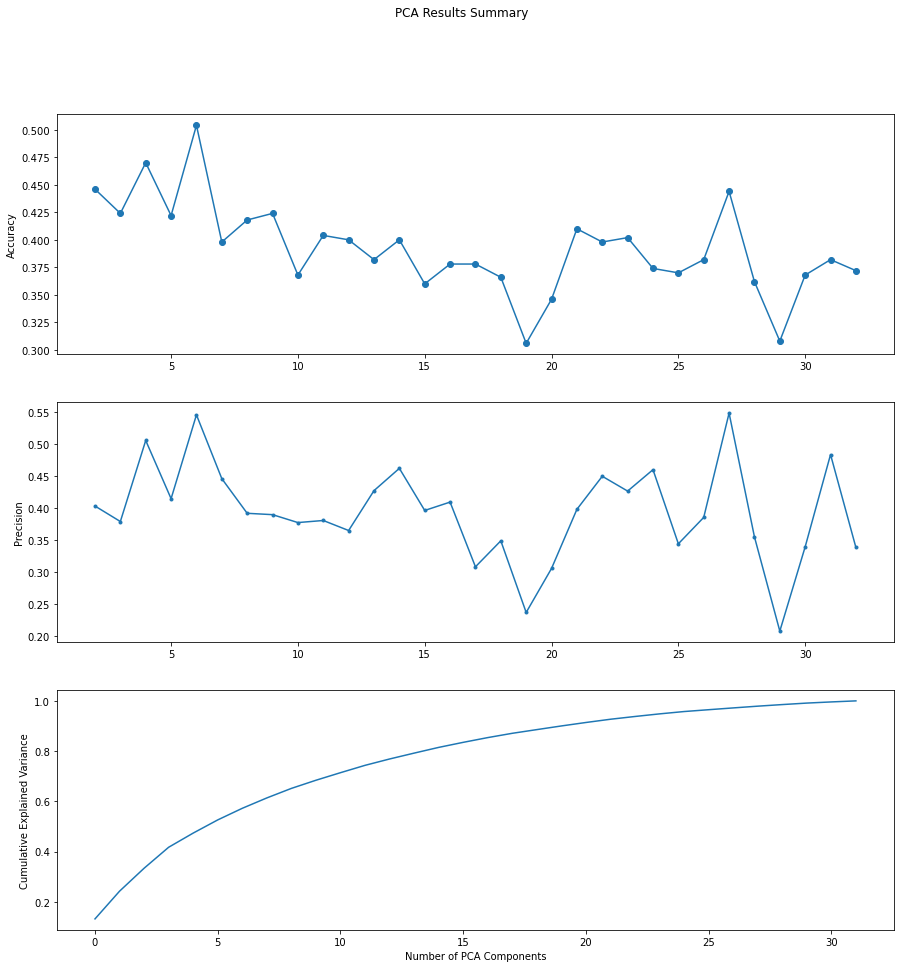

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,15))
fig.suptitle('PCA Results Summary')

ax1.plot(results.index, results.accuracy, 'o-')
ax1.set_ylabel('Accuracy')

ax2.plot(results.index, results.precision, '.-')
ax2.set_ylabel('Precision')

pca_plot = PCA().fit(X_train)
ax3.plot(np.cumsum(pca_plot.explained_variance_ratio_))
ax3.set_ylabel('Cumulative Explained Variance')
ax3.set_xlabel('Number of PCA Components')

plt.show()